In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nhl-player-salary/NHL_Salary_Final.xlsx
/kaggle/input/nhl-salary-v2/NHL_Salary_Final_v2.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/nhl-salary-v2/NHL_Salary_Final_v2.xlsx')

In [3]:
df.head()


,Salary,Year,Month,Day,Pr_St_Val,Country_Val,Nat_Val,Ht,Wt,DftYr,...,OTT,PHI,PIT,S.J,STL,T.B,TOR,VAN,WPG,WSH
0,925000,97,1,30,1,1,1,74,190,2015,...,1,0,0,0,0,0,0,0,0,0
1,2250000,93,12,21,2,1,1,74,207,2012,...,1,0,0,0,0,0,0,0,0,0
2,8000000,88,4,16,3,2,2,72,218,2006,...,0,0,0,0,0,0,0,0,0,0
3,3500000,92,1,7,2,1,1,77,220,2010,...,0,0,0,0,0,0,0,1,0,0
4,1750000,94,3,29,2,1,1,76,217,2012,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X = df.values[:, 1:176]
Y = df['Salary']

In [5]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split (x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)


(629, 175)
(629,)
(175, 175)
(175,)
(70, 175)
(70,)


In [6]:
#We will do this if we decide to standardize our data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [7]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

formula = ''' Salary ~ Year + Month + Day + Pr_St_Val + Country_Val + Nat_Val + Ht + Wt + DftYr + DftRd + Ovrl + Left + Right + LW + RW + C + D + GP + G + A + A1 + A2 + PTS + Plus_Minus + E_Plus_Minus + PIM + Shifts + TOI + TOIX + TOI_GP + TOI% + IPP% + SH% + SV% + PDO + F_60 + A_60 + Pct% + Diff + Diff_60 + iCF + iFF + iSF + ixG + iSCF + iRB + iRS + iDS + sDist + sDist + Pass + iHF + iHF_2 + iHA + iHDf + iMiss + iGVA + iTKA + iBLK + iGVA + iTKA + iBLK + BLK% + iFOW + iFOL + FO% + %FOT + dzFOW + dzFOL + nzFOW + nzFOL + ozFOW + ozFOL + FOW.Up + FOL.Up + FOW.Down + FOL.Down + FOW.Close + FOL.Close + OTG + 1G + GWG + ENG + PSG + PSA + G.Bkhd + G.Dflct + G.Slap + G.Snap + G.Tip + G.Wrap + G.Wrst + CBar + Post + Over + Wide + S.Bkhd + S.Dflct + S.Slap + S.Snap + S.Tip + S.Wrap + S.Wrst + iPenT + iPenD + iPENT_2 + iPEND_2 + iPenDf + NPD + Mins + Maj + Match + Misc + Game + CF + CA + FF + FA + SF + SA + xGF + xGA + SCF + SCA + GF + GA + RBF + RBA + RSF + RSA + DSF + DSA + FOW + FOL + HF + HA + GVA + TKA + PENT + PEND + PS + DPS + PS + OTOI + Grit + DAP + Pace + GS + GS_G + ANA + ARI + BOS + BUF + CAR + CBJ + CGY + CHI + COL + DAL + DET + EDM + FLA + L.A + MIN + MTL + N.J + NSH + NYI + NYR + OTT + PHI + PIT + S.J + STL + T.B + TOR + VAN + WPG + WSH
'''

X = sm.add_constant(x_train) # adding a constant
 
model = sm.OLS(y_train, X)

results = model.fit()
 
print_model = results.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     9.980
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           2.05e-85
Time:                        02:02:46   Log-Likelihood:                -9615.9
No. Observations:                 629   AIC:                         1.957e+04
Df Residuals:                     461   BIC:                         2.031e+04
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.362e+06   4.91e+04     48.081      0.0

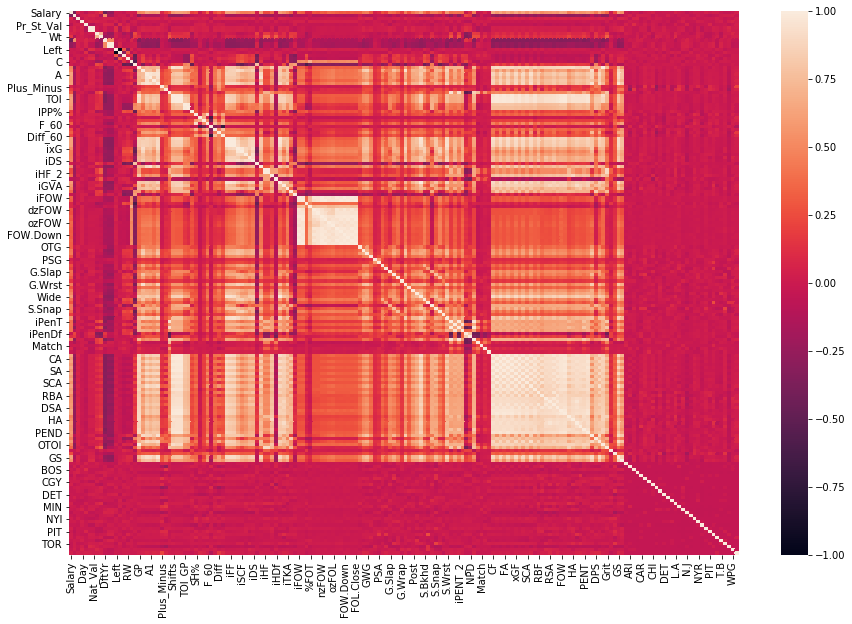

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(method ='pearson') 
plt.figure(figsize=(15, 10))
sns.heatmap(corr)
plt.show()

The problem with the dataset is that there is a multicollinearity problem. This is because there are predictor variables that are highly correlated with each other. This is seen with variables like country and nationality (0.97), height and weight (0.72). Looking at the heat map above there are sections that are mostly white, which is where there are high correlations. It is possible for us to calculate the VIF (Variance Inflation Factor) score between each variable and our target, which would determine which variables should be removed. It is also possible for us to run a PCA (Principle Component Analysis), which is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

To perform a more simple approach I have decided to bring in only variables that are significant based on our first regression model, and variables that have a high correlation score back to salary. Again, this is not a perfect solution however it is a statistically sound approach. If this model were to be used in production I would suggest performing a PCA analysis or doing some feature engineering.

In [9]:
df2 = df[['Salary','Year','Wt','DftYr','RW','G','A1','A2','PTS','TOI%','iRB','iRS','iDS',
'FOW.Up','FOL.Up','S.Bkhd','Game','xGF','RBA','FOL','GS_G','COL','DAL','PIT','TOR',]]

df2

,Salary,Year,Wt,DftYr,RW,G,A1,A2,PTS,TOI%,...,S.Bkhd,Game,xGF,RBA,FOL,GS_G,COL,DAL,PIT,TOR
0,925000,97,190,2015,0,0,0,0,0,15.2,...,0,0,0.5,1,5,-0.38,0,0,0,0
1,2250000,93,207,2012,0,2,6,9,17,39.0,...,2,0,62.0,82,939,0.18,0,0,0,0
2,8000000,88,218,2006,1,19,13,13,45,33.1,...,19,0,70.8,34,600,0.57,0,0,0,0
3,3500000,92,220,2010,0,1,5,0,6,36.1,...,0,0,22.0,20,328,0.20,0,0,0,0
4,1750000,94,217,2012,1,7,4,8,19,23.5,...,7,1,33.5,37,490,0.27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,632500,97,219,2011,0,1,0,2,3,25.0,...,0,0,10.5,7,108,0.12,0,0,0,0
870,600000,95,205,2009,0,0,2,0,2,22.1,...,2,0,3.4,2,58,0.03,0,0,0,0
871,5500000,97,210,2011,0,13,17,20,50,33.7,...,6,0,81.9,38,783,0.80,0,0,0,0
872,832500,98,181,2013,1,19,8,4,31,23.9,...,18,0,43.7,19,446,0.57,0,0,0,0


In [10]:
X = df2.values[:, 1:25]
Y = df2['Salary']

In [11]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split (x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(629, 24)
(629,)
(175, 24)
(175,)
(70, 24)
(70,)


In [12]:
X = sm.add_constant(x_train) # adding a constant
 
model2 = sm.OLS(y_train, X)

results2 = model2.fit()
 
print_model2 = results2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     42.30
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          1.64e-112
Time:                        02:02:49   Log-Likelihood:                -9786.8
No. Observations:                 629   AIC:                         1.962e+04
Df Residuals:                     604   BIC:                         1.973e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.449e+08   2.46e+07      5.893      0.0

The model is still having problems with multicollinearity. Let's reduce the dataset further 

In [13]:
df3 = df[['Salary','Year','DftYr','RW','G','A1','A2','PTS','TOI%',
'FOW.Up','S.Bkhd','TOR']]

df3

,Salary,Year,DftYr,RW,G,A1,A2,PTS,TOI%,FOW.Up,S.Bkhd,TOR
0,925000,97,2015,0,0,0,0,0,15.2,0,0,0
1,2250000,93,2012,0,2,6,9,17,39.0,0,2,0
2,8000000,88,2006,1,19,13,13,45,33.1,13,19,0
3,3500000,92,2010,0,1,5,0,6,36.1,0,0,0
4,1750000,94,2012,1,7,4,8,19,23.5,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
869,632500,97,2011,0,1,0,2,3,25.0,0,0,0
870,600000,95,2009,0,0,2,0,2,22.1,12,2,0
871,5500000,97,2011,0,13,17,20,50,33.7,0,6,0
872,832500,98,2013,1,19,8,4,31,23.9,8,18,0


In [14]:
X = df3.values[:, 1:12]
Y = df3['Salary']

In [15]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split (x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(629, 11)
(629,)
(175, 11)
(175,)
(70, 11)
(70,)


In [16]:
X = sm.add_constant(x_train) # adding a constant
 
model3 = sm.OLS(y_train, X)

results3 = model3.fit()
 
print_model3 = results3.summary()
print(print_model3)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     86.24
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          5.81e-117
Time:                        02:02:49   Log-Likelihood:                -9804.0
No. Observations:                 629   AIC:                         1.963e+04
Df Residuals:                     617   BIC:                         1.969e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.544e+08   2.43e+07      6.346      0.0

In [17]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df3[['Salary','Year','DftYr','RW','G','A1','A2','PTS','TOI%','FOW.Up','S.Bkhd','TOR']]
X['Intercept'] = 1


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variables'] = X.columns

**Values > 10 indicate presence of significant multicollinearity**

In [19]:
vif.round(1)

,VIF Factor,Variables
0,2.3,Salary
1,1.5,Year
2,1.6,DftYr
3,1.3,RW
4,16602.9,G
5,12793.4,A1
6,7674.5,A2
7,89819.2,PTS
8,2.3,TOI%
9,1.4,FOW.Up


Based on this let's drop G, A1, A2, Pts

In [20]:
df4 = df[['Salary','Year','DftYr', 'RW', 'TOI%','FOW.Up','S.Bkhd','TOR']]

df4

,Salary,Year,DftYr,RW,TOI%,FOW.Up,S.Bkhd,TOR
0,925000,97,2015,0,15.2,0,0,0
1,2250000,93,2012,0,39.0,0,2,0
2,8000000,88,2006,1,33.1,13,19,0
3,3500000,92,2010,0,36.1,0,0,0
4,1750000,94,2012,1,23.5,3,7,0
...,...,...,...,...,...,...,...,...
869,632500,97,2011,0,25.0,0,0,0
870,600000,95,2009,0,22.1,12,2,0
871,5500000,97,2011,0,33.7,0,6,0
872,832500,98,2013,1,23.9,8,18,0


In [21]:
X = df4.values[:, 1:8]
Y = df4['Salary']

In [22]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split (x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(629, 7)
(629,)
(175, 7)
(175,)
(70, 7)
(70,)


In [23]:
X = sm.add_constant(x_train) # adding a constant
 
model4 = sm.OLS(y_train, X)

results4 = model4.fit()
 
print_model4 = results4.summary()
print(print_model4)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     114.7
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          1.60e-107
Time:                        02:02:49   Log-Likelihood:                -9835.9
No. Observations:                 629   AIC:                         1.969e+04
Df Residuals:                     621   BIC:                         1.972e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.511e+08   2.55e+07      5.925      0.0

In [24]:
X = df4[['Salary','Year','DftYr', 'RW', 'TOI%','FOW.Up','S.Bkhd','TOR']]
X['Intercept'] = 1


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variables'] = X.columns

vif.round(1)

,VIF Factor,Variables
0,2.1,Salary
1,1.5,Year
2,1.6,DftYr
3,1.2,RW
4,1.7,TOI%
5,1.3,FOW.Up
6,1.5,S.Bkhd
7,1.0,TOR
8,188073.3,Intercept


In [25]:
X = sm.add_constant(x_test) # adding a constant
 
model5 = sm.OLS(y_test, X)

results5 = model5.fit()
 
print_model5 = results5.summary()
print(print_model5)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     22.35
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           3.61e-21
Time:                        02:02:49   Log-Likelihood:                -2766.1
No. Observations:                 175   AIC:                             5548.
Df Residuals:                     167   BIC:                             5574.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.669e+08   5.57e+07      2.996      0.0

In [26]:
df5 = df[['Salary','Year','TOI%','FOW.Up']]
X = df5.values[:, 1:4]
Y = df5['Salary']

In [27]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split (x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(629, 3)
(629,)
(175, 3)
(175,)
(70, 3)
(70,)


In [28]:
X = sm.add_constant(x_train) # adding a constant
 
model5 = sm.OLS(y_train, X)

results5 = model5.fit()
 
print_model5 = results5.summary()
print(print_model5)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     191.7
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           4.05e-88
Time:                        02:02:49   Log-Likelihood:                -9891.7
No. Observations:                 629   AIC:                         1.979e+04
Df Residuals:                     625   BIC:                         1.981e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.986e+06   1.36e+06      5.856      0.0

In [29]:
#Let's run against our test dataset
X = sm.add_constant(x_test) # adding a constant
 
model5 = sm.OLS(y_test, X)

results5 = model5.fit()
 
print_model5 = results5.summary()
print(print_model5)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     47.72
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           1.84e-22
Time:                        02:02:49   Log-Likelihood:                -2770.7
No. Observations:                 175   AIC:                             5549.
Df Residuals:                     171   BIC:                             5562.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.572e+07   3.07e+06      5.122      0.0

Let's finally test against our validation dataset

In [30]:
X = sm.add_constant(x_val) # adding a constant
 
model5 = sm.OLS(y_val, X)

results5 = model5.fit()
 
print_model5 = results5.summary()
print(print_model5)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     20.71
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           1.44e-09
Time:                        02:02:49   Log-Likelihood:                -1095.7
No. Observations:                  70   AIC:                             2199.
Df Residuals:                      66   BIC:                             2208.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.717e+07   3.75e+06      4.575      0.0

As one can see our model dropped in significance as we dropped variables, however our model had a problem with multicollinearity. This is because many of the variables are related or dependent on each other. A VIF test was able to show that this problem wasn't happening once we dropped the majority of the variables, and is shown in the last VIF Factor test

The process that we performed was very manual however it is possible to do more automated regression modeling and fitting using techniques like the stepwise regression which adds and takes out variables in a more automated process. There are additional advanced techniques such as the PCA or feature engineering that can be done. It is sometimes easy to work with the data when there are only a small number of variables however this isn't always the case. The most important thing is to have a working knowledge of the dataset going into modeling. This way the analyst or data expert can help determine what will be relevant to add into the model and what is simply noise. There is also the possibility of us doing more data transformations to make sure our data is more uniform. We could also transform our target variable salary to account for higher salaries, this was an issue when working with our training data set. Our model was overfitting towards the higher salaries, which is why variables like Right Wing were pulling into this analysis. Overall, I think this was a great exercise to practice working with a large dataset, however there is a lot of work that needs to be done before the model is predicting at a high enough accuracy to be usable.